In [1]:
#from bs4 import BeautifulSoup as bs
import requests
import datetime
import numpy as np
import pandas as pd
from time import ctime
import matplotlib.pyplot as plt

In [2]:
# 파일 저장 모듈

import pandas as pd
import datetime as dt
from pmaw import PushshiftAPI

class CsvSave:

    def __init__(self):
        pass
    
    # input으로 받아온 Subreddit의 댓글들을 수집합니다.
    def SelectSubreddit_comments(self):
        api = PushshiftAPI()
        before = int(dt.datetime(2022,3,1,0,0).timestamp())
        after = int(dt.datetime(2021,8,1,0,0).timestamp())
        
        subreddit= str(input('추출하려는 subreddit명을 입력하세요'))
        limit=100000
        comments = api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after)
        print(f'Pushshift를 이용하여 총 {len(comments)} 개의 코멘트들이 출력됩니다.')
        
        comments_df = pd.DataFrame(comments)
        comments_df.to_csv('./wsb_comments_'+subreddit+'.csv', header=True, index=False, columns=list(comments_df.axes[1]),encoding='utf-8')
        data = pd.read_csv('wsb_comments_'+subreddit+'.csv', encoding = 'utf8')
        return data['body']
        
    # input으로 받아온 Subreddit의 게시글들을 수집합니다.
    def SelectSubreddit_submissions(self):
        api = PushshiftAPI()
        before = int(dt.datetime(2022,3,1,0,0).timestamp())
        after = int(dt.datetime(2021,8,1,0,0).timestamp())
        
        subreddit= str(input('추출하려는 subreddit명을 입력하세요'))
        limit=100000
        submissions = api.search_submissions(subreddit=subreddit, limit=limit, before=before, after=after)
        print(f'Pushshift를 이용하여 총 {len(submissions)} 개의 게시글들이 출력됩니다.')
    
        submissions_df = pd.DataFrame(submissions)
        submissions_df.to_csv('./wsb_submissions_'+subreddit+'.csv', header=True, index=False, columns=list(submissions_df.axes[1]),encoding='utf-8')
        data = pd.read_csv('wsb_submissions_'+subreddit+'.csv', encoding = 'utf8')
        return data['selftext']

In [ ]:
Csv1 = CsvSave()

Csv1.SelectSubreddit_comments()

In [ ]:
Csv1 = CsvSave()

Csv1.SelectSubreddit_submissions()

In [3]:
# 시계열 모듈화

import pandas as pd
from time import ctime
import datetime

class CsvOpener:
    
    # comment csv file의 형식은 'wsb_comments_찾고자하는 subreddit명.csv' 입니다.
    # submission csv file의 형식은 'wsb_submissions_찾고자하는 subreddit명.csv' 입니다.
    def __init__(self, file):
        self.file = file
        self.data = pd.read_csv(file, encoding = 'utf8')
        self.header = self.data.columns

    # 정수형의 unix time을 ctime을 통해 우리가 알아볼수 있게 변환
    def TimeConverter_comment(self):    
        cr_time = []
        for i in range(len(self.data)):
            cr_time.append(ctime(self.data.created_utc[i]))
            
        # datetime으로 형 변환
        cr_time = pd.to_datetime(cr_time)
        
        # %Y-%m-%d 형식으로 수정 -> strftime을 사용하면 형변환이 되기 때문에 다시 datetime으로 형변환까지.
        format_time = cr_time.strftime('%Y-%m-%d')
        time = pd.to_datetime(format_time)
        self.data['time'] = time
        
        # 월별로 groupby도 해줍니다.
        self.data['time_month'] = self.data['time'].dt.to_period('M')
        
        # 각 데이터를 주별로 숫자를 표기해줍니다.
        self.data['time_week'] = self.data['time'].dt.week

                        
        return self.data[['body','time','time_month','time_week','score']]
   
    
    
    
    def TimeConverter_submission(self):    
        cr_time = []
        for i in range(len(self.data)):
            cr_time.append(ctime(self.data.created_utc[i]))
            
        # datetime으로 형 변환
        cr_time = pd.to_datetime(cr_time)
        
        # %Y-%m-%d 형식으로 수정 -> strftime을 사용하면 형변환이 되기 때문에 다시 datetime으로 형변환까지.
        format_time = cr_time.strftime('%Y-%m-%d')
        time = pd.to_datetime(format_time)
        self.data['time'] = time
        
        # 월별로 groupby도 해줍니다.
        self.data['time_month'] = self.data['time'].dt.to_period('M')
        
        # 각 데이터를 주별로 숫자를 표기해줍니다.
        self.data['time_week'] = self.data['time'].dt.week
        
        return self.data[['title','selftext','time','time_month','time_week','score','num_comments']]
    
    
    # 결측값을 'empty'로 수정하는 메서드 입니다.
    def FixMissingValue_submission(self):
        self.data['selftext'] = self.data['selftext'].fillna('empty')
        return self.data[['title','selftext','time','time_month','time_week','score','num_comments']]


In [8]:
squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
squidgame_time = squidgame.TimeConverter_submission()
Squidgame_sub = squidgame.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_13296/3639323632.py:1: DtypeWarning: Columns (81,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_13296/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [26]:
KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
KDRAMA_time = KDRAMA.TimeConverter_submission()
KDRAMA_sub = KDRAMA.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/881062989.py:1: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_7844/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [ ]:
korea = CsvOpener('./wsb_submissions_korea.csv')
korea_time = korea.TimeConverter_submission()
korea_sub = korea.FixMissingValue_submission()

In [ ]:
koreanvariety = CsvOpener('./wsb_submissions_koreanvariety.csv')
koreanvariety_time = koreanvariety.TimeConverter_submission()
koreanvariety_sub = koreanvariety.FixMissingValue_submission()

In [56]:
squidgame = CsvOpener('./wsb_comments_squidgame.csv')
Squidgame_co = squidgame.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_13296/3384557049.py:1: DtypeWarning: Columns (17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_comments_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_13296/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [ ]:
KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
KDRAMA_co = KDRAMA.TimeConverter_comment()

In [ ]:
korea = CsvOpener('./wsb_comments_korea.csv')
korea_co = korea.TimeConverter_comment()

In [ ]:
koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
koreanvariety_co = koreanvariety.TimeConverter_comment()

In [4]:
# 텍스트 마이닝 모듈 

import unicodedata
import sys
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 


class TextEditor():
    
    def __init__(self, file):
        self.file = file
        
    def textEditor(self):
        textlist = list(self.file[str(input('column명을 입력하세요'))].values)
        
        for text in textlist:
            if (text == '[removed]') or (text == '[deleted]') or ('I am a bot' in text):
                textlist.remove(text)

        # 문자열의 구두점을 삭제.
        punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
        titles_punctuation = [string.translate(punctuation) for string in textlist]
        
        titles_fixed = []
        special = re.compile(r'[^ A-Za-z+]')
        for i in titles_punctuation:
            titles_fixed.append(special.sub('',i))
        
        
        titles_tokenized = []
        for titles_token in titles_fixed:
            element = titles_token.split(" ")
            for element_token in element:
                if element_token != '':
                    titles_tokenized.append(element_token.lower())
        
        stop_words = stopwords.words('english') # 불용어 로드
        titles_fixed_stopwords = [word for word in titles_tokenized if word not in stop_words] # 불용어 삭제
       
    
        title = []
        for titles in titles_fixed_stopwords:
            if len(titles) > 2:
                title.append(titles)
                
        result = []
        lemmatizer=WordNetLemmatizer()
        for word in title:
            result.append(lemmatizer.lemmatize(word))
        
        text_refined = []
        for i in result:
            text_tagged = pos_tag(word_tokenize(i))
            text_refined.append(text_tagged)
          
        text_refined2 = []
        for i in range(len(text_refined)):
            text_refined2.append(text_refined[i][0])
            
        return text_refined2

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
Squidgame_sub = TextEditor(Squidgame_sub)
text_refined = Squidgame_sub.textEditor()

column명을 입력하세요title


In [12]:
KDRAMA_sub = TextEditor(KDRAMA_sub)
text_refined = KDRAMA_sub.textEditor()

column명을 입력하세요title


In [ ]:
korea_sub = TextEditor(korea_sub)
text_refined = korea_sub.textEditor()

In [ ]:
koreanvariety_sub = TextEditor(koreanvariety_sub)
text_refined = koreanvariety_sub.textEditor()

In [6]:
Squidgame_co = TextEditor(Squidgame_co)
text_refined = Squidgame_co.textEditor()

column명을 입력하세요body


In [7]:
text_refined

[('hey', 'NN'),
 ('ill', 'NN'),
 ('help', 'NN'),
 ('modding', 'VBG'),
 ('want', 'NN'),
 ('series', 'NN'),
 ('look', 'NN'),
 ('awesome', 'NN'),
 ('love', 'NN'),
 ('discussing', 'VBG'),
 ('show', 'NN'),
 ('reddit', 'NN'),
 ('get', 'VB'),
 ('feeling', 'VBG'),
 ('sub', 'NN'),
 ('blow', 'NN'),
 ('show', 'NN'),
 ('air', 'NN'),
 ('might', 'MD'),
 ('well', 'RB'),
 ('prepare', 'NN'),
 ('beforehand', 'NN'),
 ('really', 'RB'),
 ('find', 'VB'),
 ('game', 'NN'),
 ('get', 'VB'),
 ('marble', 'NN'),
 ('cousin', 'NN'),
 ('told', 'NN'),
 ('looked', 'VBD'),
 ('like', 'IN'),
 ('gta', 'NN'),
 ('loading', 'VBG'),
 ('screen', 'NN'),
 ('actually', 'RB'),
 ('winner', 'NN'),
 ('sinn', 'NN'),
 ('nice', 'JJ'),
 ('money', 'NN'),
 ('sangwoo', 'NN'),
 ('kill', 'NN'),
 ('friend', 'NN'),
 ('death', 'NN'),
 ('isnt', 'NN'),
 ('fightingstrength', 'NN'),
 ('game', 'NN'),
 ('degree', 'NN'),
 ('brain', 'NN'),
 ('involved', 'VBN'),
 ('throw', 'NN'),
 ('agility', 'NN'),
 ('speed', 'NN'),
 ('sang', 'NN'),
 ('woo', 'NN'),
 ('fa

---

In [8]:
title = text_refined

In [27]:
selftext = text_refined

In [60]:
text_forwc = title + selftext 

# 워드클라우드

squidgame_sub, squidgame_co 만

In [5]:
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

NN_stopwords = ['player','squid', 'game', 'squidgame', 'spoiler', 'episode','thing','think','didnt','dont', 'want', 'wouldnt','understand','feel','show','wasnt','theyre','couldnt']
JJ_stopwords = ['empty','english', 'ive', 'american', 'red', 'green']

def tag_wordcloud(element, tag):
    tag_list = []
    for i in element:
        if tag in i:
            tag_list.append(i[0])
    
    if tag == 'JJ':
        tag_list = [word for word in tag_list if word not in JJ_stopwords]
    elif tag == 'NN':
        tag_list = [word for word in tag_list if word not in NN_stopwords]

    count = Counter(tag_list)
    print(count)
    
    wc = WordCloud(max_words = 2000, width = 1600, height = 800)
    generate = wc.generate_from_frequencies(count)
    plt.figure(figsize=(18,18))
    plt.imshow(generate, interpolation = 'bilinear')
    wc.to_file(tag+'_squidgame.png')

# 그래프

각 subreddit sub, com 증감률

In [71]:
squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
squidgame_time = squidgame.TimeConverter_submission()
Squidgame_sub = squidgame.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/3639323632.py:1: DtypeWarning: Columns (81,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_submissions_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [40]:
KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
KDRAMA_time = KDRAMA.TimeConverter_submission()
KDRAMA_sub = KDRAMA.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/881062989.py:1: DtypeWarning: Columns (82,83) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_submissions_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [45]:
korea = CsvOpener('./wsb_submissions_korea.csv')
korea_time = korea.TimeConverter_submission()
korea_sub = korea.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [48]:
koreanvariety = CsvOpener('./wsb_submissions_koreanvariety.csv')
koreanvariety_time = koreanvariety.TimeConverter_submission()
koreanvariety_sub = koreanvariety.FixMissingValue_submission()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:59: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [51]:
squidgame = CsvOpener('./wsb_comments_squidgame.csv')
squidgame_co = squidgame.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/1149917347.py:1: DtypeWarning: Columns (17,50) have mixed types.Specify dtype option on import or set low_memory=False.
  squidgame = CsvOpener('./wsb_comments_squidgame.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [54]:
KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
KDRAMA_co = KDRAMA.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/16459012.py:1: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  KDRAMA = CsvOpener('./wsb_comments_KDRAMA.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [57]:
korea = CsvOpener('./wsb_comments_korea.csv')
korea_co = korea.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/3448111325.py:1: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  korea = CsvOpener('./wsb_comments_korea.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [60]:
koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
koreanvariety_co = koreanvariety.TimeConverter_comment()

C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/1994467615.py:1: DtypeWarning: Columns (3,41) have mixed types.Specify dtype option on import or set low_memory=False.
  koreanvariety = CsvOpener('./wsb_comments_koreanvariety.csv')
C:\Users\neimb\AppData\Local\Temp/ipykernel_11568/2265057606.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  self.data['time_week'] = self.data['time'].dt.week


In [72]:
def graph(dataframe):
    sns.countplot(x=dataframe['time_week'], data=dataframe, order=[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9])
    plt.savefig(str(input("파일명"))+".png")

파일명Squidgame_sub


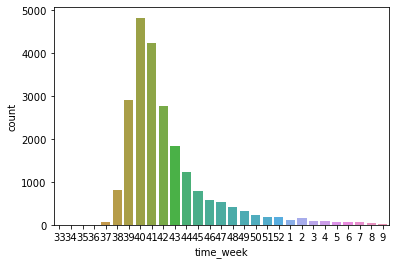

In [73]:
graph(Squidgame_sub)

# 감정분석

In [49]:
# 만들어놓았던 DataFrame을 이용하여 감정분석을 실시합니다.
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

sentiment = [ sia.polarity_scores(i) for i in Squidgame_sub.title]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\neimb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:
# 감정분석의 결과를 sendata 변수에 저장합니다.
# 시간에 따른 감정지수의 변화를 확인하기 위해, 기존 DataFrame에서 time_week 컬럼을 가져옵니다.
sendata = pd.DataFrame(sentiment)
sendata['time_week'] = Squidgame_sub.time_week

# time_week컬럼은 각 연도의 n주차, 정수 데이터로 표시되어있기때문에, 먼저 21년/22년의 데이터를 구분해줍니다.
result = []
for i in sendata['time_week'].values:
    if i > 10:
        result.append(datetime.date.fromisocalendar(2021,i,1))
    else:
        result.append(datetime.date.fromisocalendar(2022,i,1))
        
sendata['time_week'] = np.array(result)

In [51]:
# time_week 컬럼을 기준으로 각 수치들의 평균을 구해줍니다. 
sendata = sendata.groupby('time_week').mean()

# 필요없거나, 결측값을 제거해줍니다.
sendata = sendata.drop(sendata.index[0])
sendata = sendata.drop(sendata.index[-1])

# 시각화에 더욱 유리하게, neg(부정)컬럼의 값을 음수로 바꿔주고, neu(중립)컬럼을 삭제해줍니다.
sendata['neg'] = sendata.neg * -1
sendata = sendata.drop(['neu'],axis=1)

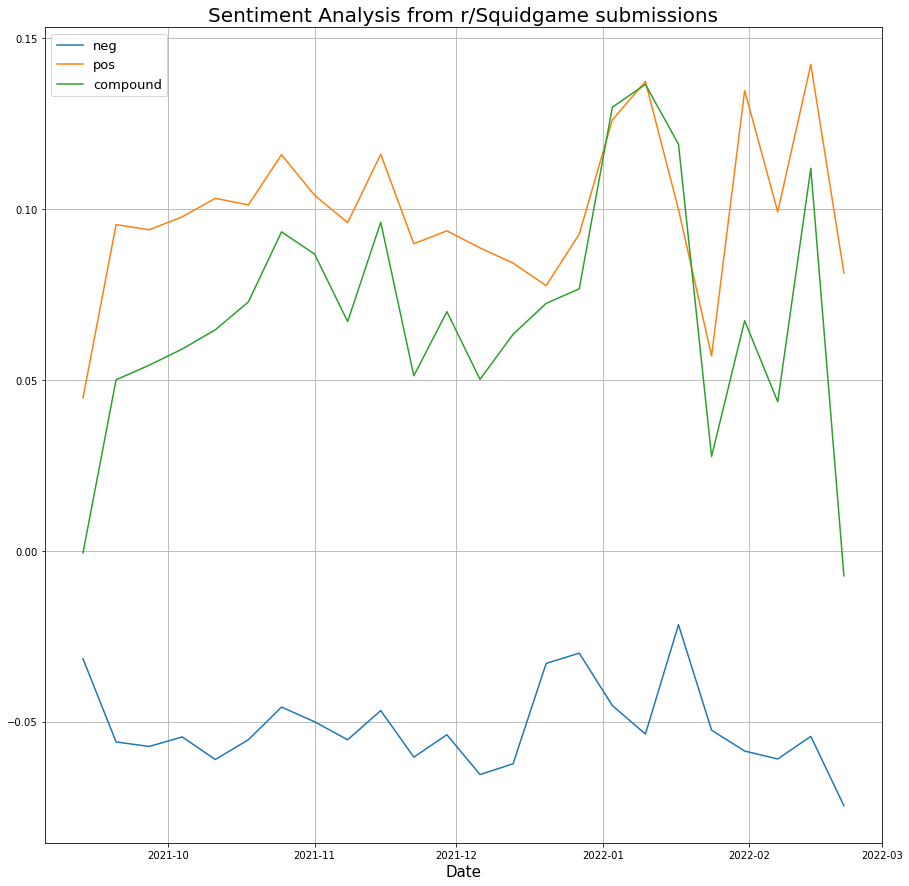

In [55]:
# r/squidgame의 게시글 title로부터 추출한 시간에 따른 이용자들의 감정변화 그래프
sendata.plot.line()

plt.rcParams["figure.figsize"] = (15,15)
plt.title('Sentiment Analysis from r/Squidgame submissions', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.legend(fontsize=13, loc='best')
plt.grid()
plt.show()